In [36]:
import numpy as np
from scipy.optimize import linprog
from fractions import Fraction
import pylab
import matplotlib.lines as lines


def nash_equilibrium(a):
    n = a.shape[0] #Кол-во строк.
    m = a.shape[1] #Кол-во столбцов.
    
    subValue = np.min(a) 
    if (subValue > 0): 
        subValue = 0
    
    #Поиск оптимальной стратегии первого игрока.
    c = np.ones(n)                      #Целевая ф-ия.  
    a_ub = -np.transpose(a - subValue)  #Матрица ограничений.
    b_ub = -np.ones(m)                  #Столбец свободных членов.
    solve = linprog(c, a_ub, b_ub)
    v = 1 / solve.fun #Цена игры.
    p = solve.x / v   #Оптимальная стратегия первого игрока.
    
    #Поиск оптимальной стратегии второго игрока.
    c = -np.ones(m)       #Целевая ф-ия.
    a_ub = a - subValue   #Матрица ограничений.
    b_ub = np.ones(n)     #Столбец свободных членов. 
    solve = linprog(c, a_ub, b_ub)
    q = solve.x / v   #Оптимальная стратегия второго игрока.
    
    return v + subValue, p, q


'''
Функция преобразования вещественного числа в рациональное.
'''
def number_to_fraction(number):
    return Fraction(number).limit_denominator()
    
    
'''
Функция, которая преобразует массив вещественных чисел
в список рациональных чисел.
'''
def array_to_fraction(x):
    xf = []
    for i in range(x.size):
        xf.append(number_to_fraction(x[i]))
    return xf


'''
Функция, которая выводить цену игры и оптимальные
стратегии игроков в красивом виде.
'''
def print_solve(v, p, q):
    pf = array_to_fraction(p)
    qf = array_to_fraction(q)
    
    str_p = "| p |"
    str_q = "| q |"
    
    for i in range(max(len(pf), len(qf))):
        if (i < len(pf)):
            str_p = str_p + "| " + str(pf[i])
        if (i < len(qf)):
            str_q = str_q + "| " + str(qf[i])
        l = max(len(str_p), len(str_q))
        
        str_p = str_p.ljust(l)
        str_q = str_q.ljust(l)
        
        if (i < len(pf)):
            str_p = str_p + " |" 
        if (i < len(qf)):
            str_q = str_q + " |"
      
    print("Value = " + str(number_to_fraction(v)))
    print(str_p)
    print(str_q)

    
'''
Функция, которая рисует график.
'''
def draw_plot(title, data):
    pylab.title(title)
    pylab.ylim(0, min(max(data) * 2, 1.1))
    pylab.xticks(np.arange(1, len(data) + 1, 1.0))
    for i in range(0, len(data)):
        pylab.scatter(i + 1, data[i], c='b', s=16).set_clip_on(False)
        line = lines.Line2D([i + 1, i + 1], [0, data[i]], c='b', linewidth = 1)
        pylab.gca().add_line(line)

    pylab.show()
    

'''
Функция, которая находит цену игры и оптимальные стратегии игроков, а
затем выводит эти данные.
'''
def solve_example(A):
    (v, p, q) = nash_equilibrium(A)
    print_solve(v, p, q)
    draw_plot("The optimal strategy for the first player", p)
    draw_plot("The optimal strategy for the second player", q)

# Примеры различных игр
## Игра из описания задания

Value = 151/31
| p || 0 || 124/22801 || 93/22801    || 837/45602 || 651/45602   || 0        |
| q || 0 || 0         || 7967/273612 || 279/45602 || 1705/273612 || 31/45602 |


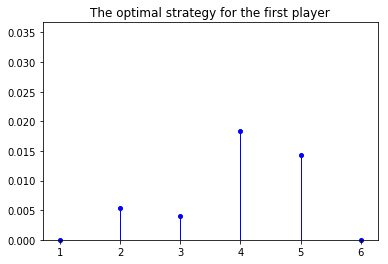

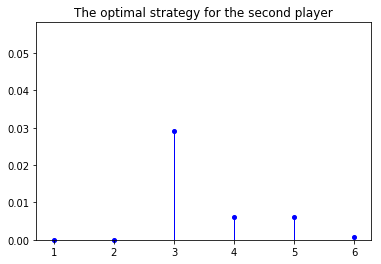

In [37]:
A = np.array([[4, 0, 6, 2, 2, 1],
               [3, 8, 4, 10, 4, 4],
               [1, 2, 6, 5, 0, 0],
               [6, 6, 4, 4, 10, 3],
               [10, 4, 6, 4, 0, 9],
               [10, 7, 0, 7, 9, 8]])

solve_example(A)

## Спектр оптимальной стратегии не полон

Value = 4/5
| p || 0 || 5/81  || 20/81 |
| q || 0 || 20/81 || 5/81  |


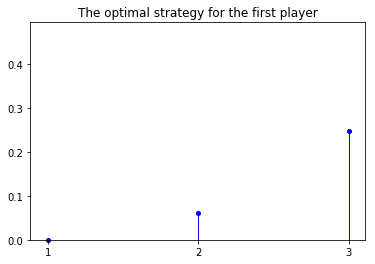

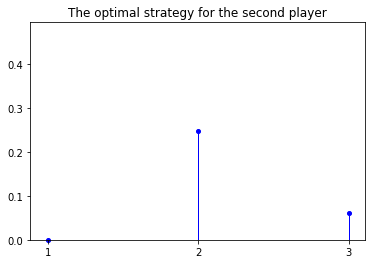

In [38]:
A = np.array([[0, -1, 2],
             [1, 0, 4],
             [2, 1, 0]])

solve_example(A)

## Спектр оптимальной стратегии полон

Value = 17
| p || 3/1156 || 1/1156 |
| q || 1/578  || 1/578  |


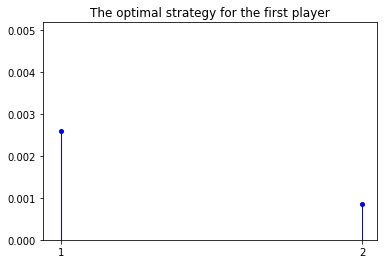

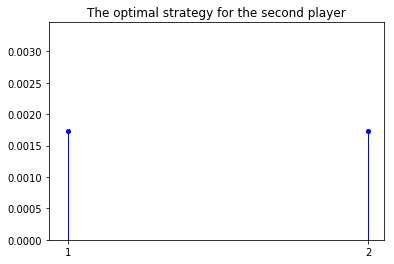

In [39]:
A = np.array([[12, 22],
              [32, 2]])

solve_example(A)

## Спект оптимальной стратегии выражается в чистых стратегиях

Value = 10
| p || 0 || 1/100 || 0 |
| q || 0 || 1/100 || 0 |


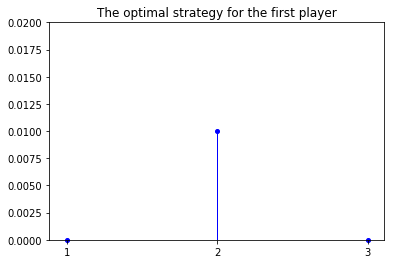

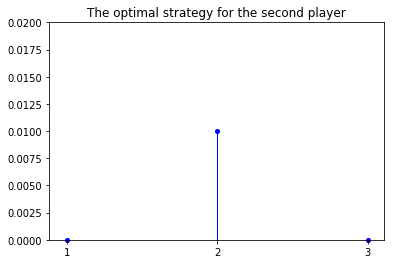

In [40]:
A = np.array([[0, 2, 2],
             [11, 10, 40],
             [2, 1, 0]])

solve_example(A)